In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [2]:
training_df = pd.read_csv('../dataset/Training.csv')
testing_df = pd.read_csv('../dataset/Training.csv')

In [3]:
print("Missing values in training data:", training_df.isnull().sum().sum())
print("Missing values in testing data:", testing_df.isnull().sum().sum())

Missing values in training data: 4920
Missing values in testing data: 4920


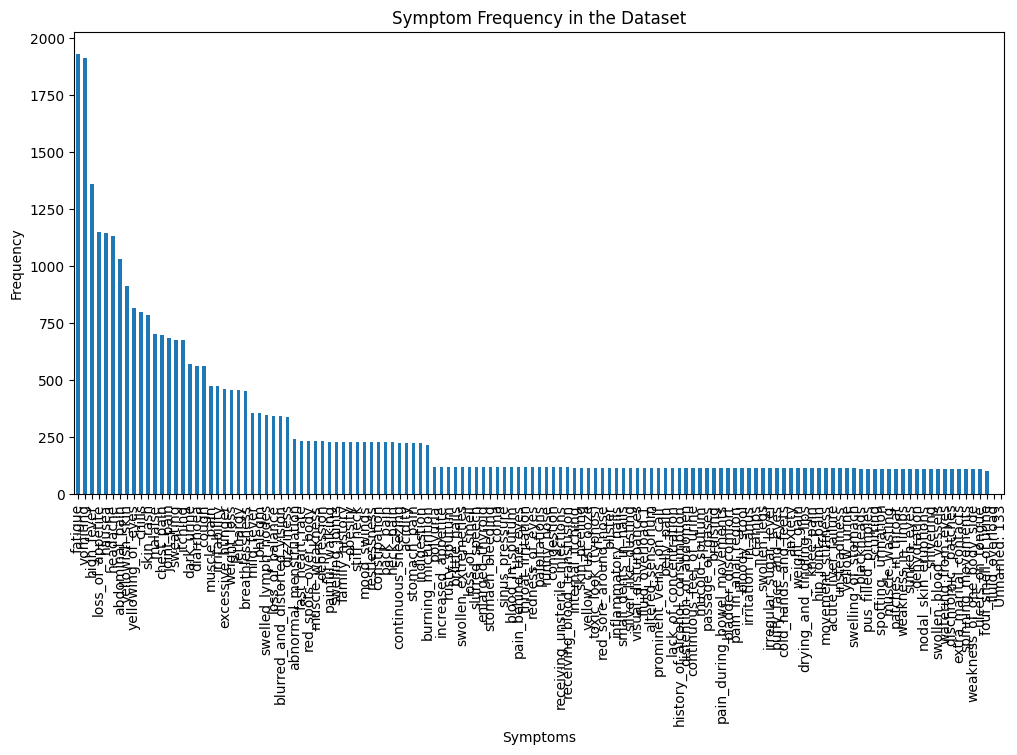

In [4]:
symptom_frequencies = training_df.drop(columns=['prognosis']).sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
symptom_frequencies.plot(kind='bar')
plt.title('Symptom Frequency in the Dataset')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.show()

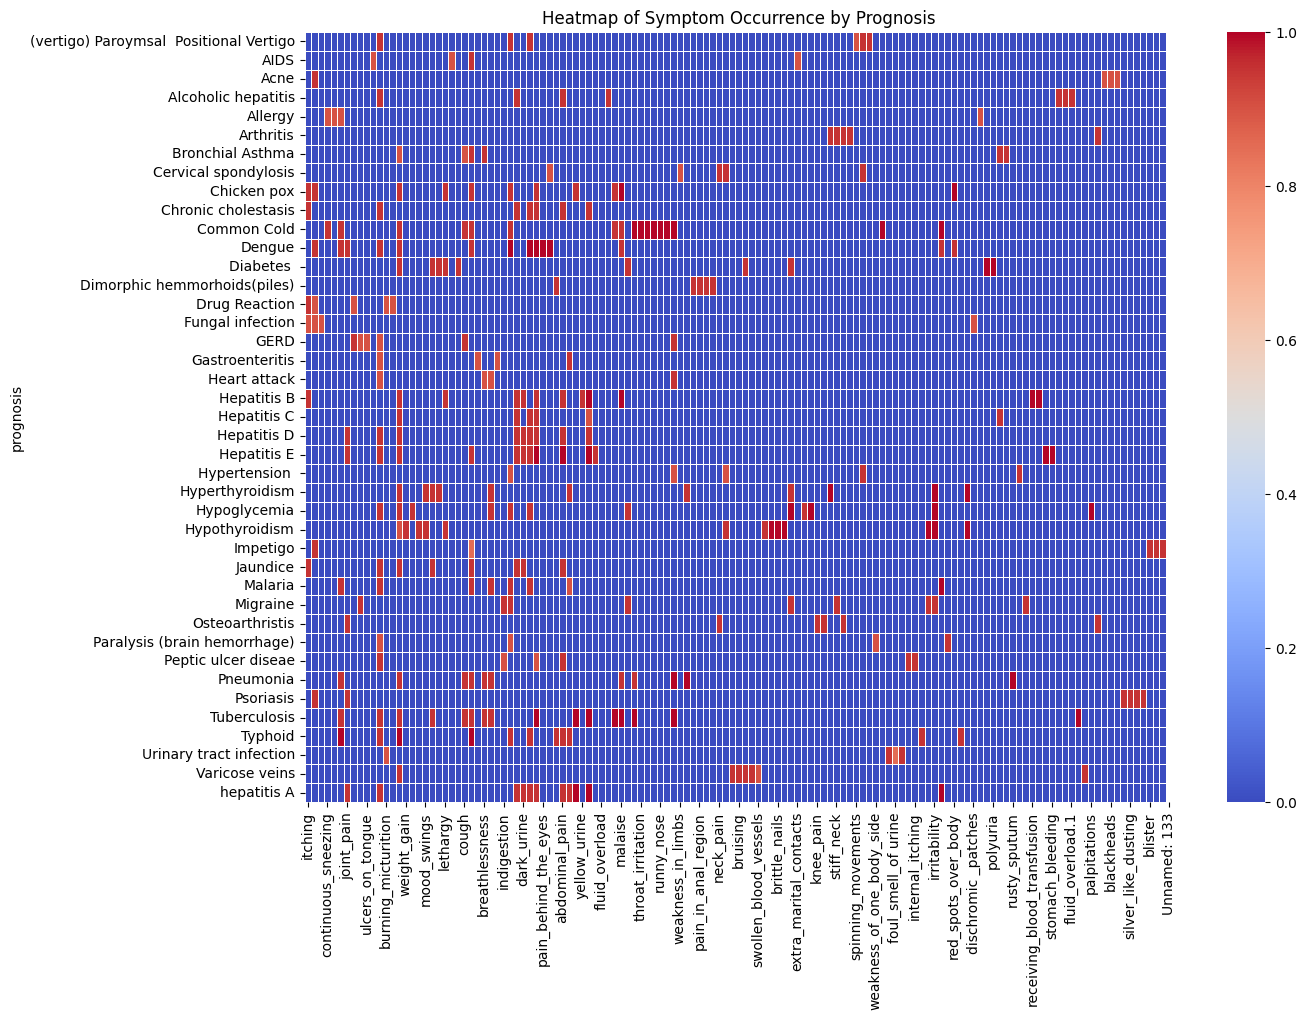

In [5]:
prognosis_symptom_mean = training_df.groupby('prognosis').mean()
plt.figure(figsize=(14, 10))
sns.heatmap(prognosis_symptom_mean, cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap of Symptom Occurrence by Prognosis')
plt.show()

In [6]:
training_df_cleaned = training_df.fillna(0)

In [7]:
X = training_df_cleaned.drop(columns=['prognosis'])
y = training_df_cleaned['prognosis']

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),  # Remove use_label_encoder
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Initialize a list to store the results
results = []

# Train, test, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    
    # If Linear Regression, use regression metrics, else classification metrics
    if model_name == "Linear Regression":
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results.append({
            'Model': model_name,
            'MSE': mse
        })
    else:
        y_pred = model.predict(X_test)  # Predict on the test set
        
        # Calculate classification metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)  # Use zero_division to avoid warnings
        recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        
        # Append the results to the list
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the evaluation results
print(results_df)

D:\GitHub\Doctorify-ML-based-Disease-Prognosis-App\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                 Model       MSE  Accuracy  Precision    Recall  F1 Score
0    Linear Regression  3.963761       NaN        NaN       NaN       NaN
1  Logistic Regression       NaN  1.000000   1.000000  1.000000  1.000000
2        Random Forest       NaN  1.000000   1.000000  1.000000  1.000000
3        Decision Tree       NaN  1.000000   1.000000  1.000000  1.000000
4                  KNN       NaN  1.000000   1.000000  1.000000  1.000000
5                  SVM       NaN  1.000000   1.000000  1.000000  1.000000
6          Naive Bayes       NaN  1.000000   1.000000  1.000000  1.000000
7              XGBoost       NaN  1.000000   1.000000  1.000000  1.000000
8             AdaBoost       NaN  0.089431   0.073572  0.097561  0.073961


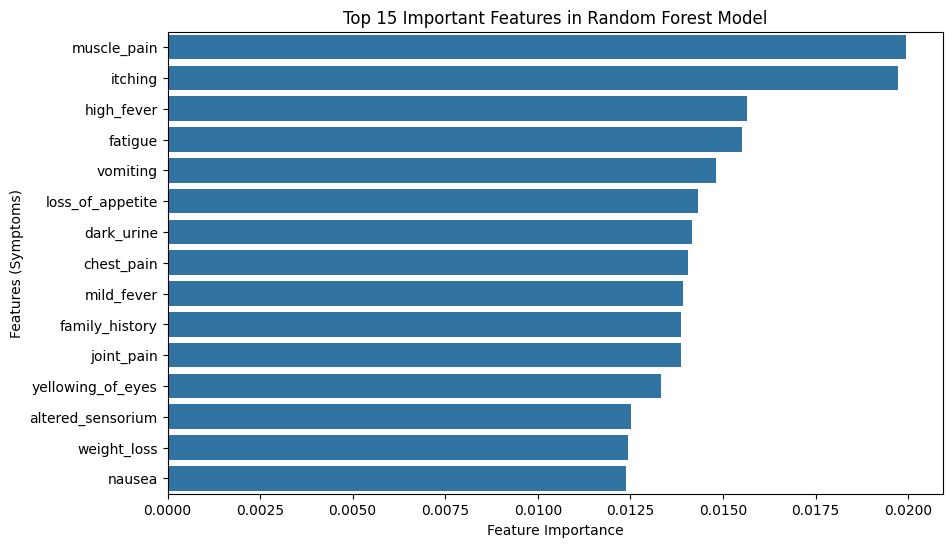

In [14]:
rf_model = models["Random Forest"]
feature_importances = rf_model.feature_importances_
indices = feature_importances.argsort()[::-1]
important_features = X_train.columns[indices]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices][:15], y=important_features[:15])
plt.title('Top 15 Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features (Symptoms)')
plt.show()